# Campo eléctrico

Erwin Renzo Franco Diaz

Campo eléctrico de una carga puntual centrada en el origen con carga $q$

$$
\mathbf{E} = \frac{q}{4 \pi \varepsilon_0} \left(\frac{x}{(x^2 + y^2)^{3/2}} \mathbf{i} + \frac{y}{(x^2 + y^2)^{3/2} }\mathbf{j}\right)
$$

(a lo largo del notebook ignoraremos la constante $1/4 \pi \varepsilon_0$).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.constants import epsilon_0 as e0

%matplotlib inline

In [20]:
def E(x, y, q, a, b):
    k = 1/(4*np.pi*e0)
    
    Ex = k*q*(x - a)/((x - a)**2 + (y - b)**2)
    Ey = k*q*(y - b)/((x - a)**2 + (y - b)**2)
    
    return Ex, Ey

def modulo(Ax, Ay):
    A = (Ax**2 + Ay**2)**(1/2)
    return A

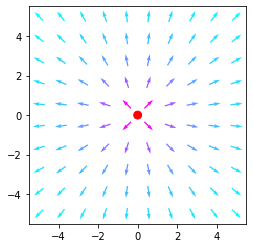

In [29]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

X, Y = np.meshgrid(x, y)

q = 1e-6

Ex, Ey = E(X, Y, q, 0, 0)

Emod = modulo(Ex, Ey)


circle = plt.Circle((0, 0), 0.2, color = 'r')

plt.quiver(X, Y, Ex/Emod, Ey/Emod, Emod, pivot = 'middle', cmap='cool', norm=colors.LogNorm(vmin=Emod.min(),vmax=Emod.max()))
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

Campo eléctrico generado por 2 cargas de signo opuesto ubicados en $(\pm 1, 0)$

$$
\mathbf{E_1} = \frac{q}{4 \pi \varepsilon_0} \left(\frac{x + 1}{((x+1)^2 + y^2)^{3/2}} \mathbf{i} + \frac{y}{((x+1)^2 + y^2)^{3/2} }\mathbf{j}\right)
$$

$$
\mathbf{E_2} = -\frac{q}{4 \pi \varepsilon_0} \left(\frac{x - 1}{((x-1)^2 + y^2)^{3/2}} \mathbf{i} + \frac{y}{((x-1)^2 + y^2)^{3/2} }\mathbf{j} \right)
$$

$$
\mathbf{E} = \mathbf{E_1} + \mathbf{E_2}
$$

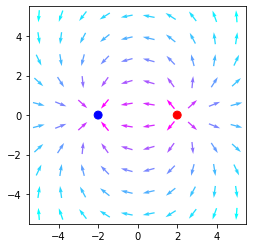

In [40]:
a = 2

Ex1, Ey1 = E(X, Y, q, a1, 0)

Ex2, Ey2 = E(X, Y, -q, a2, 0) 

Etx = Ex1 + Ex2
Ety = Ey1 + Ey2

Et = modulo(Etx, Ety)

circle_pos = plt.Circle((a, 0), 0.2, color = 'r')
circle_neg = plt.Circle((-a, 0), 0.2, color = 'b')

plt.quiver(X, Y, Etx/Et, Ety/Et, Et, 
           pivot = 'middle', 
           cmap='cool', 
           norm = colors.LogNorm(vmin=Et.min(),vmax=Et.max()))
plt.gca().add_patch(circle_pos)
plt.gca().add_patch(circle_neg)
plt.axis('scaled')
plt.show()

## Líneas de campo

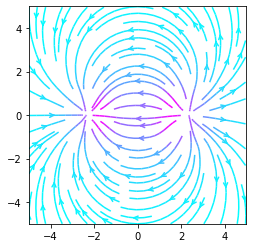

In [41]:
plt.streamplot(X, Y, Etx, Ety, color = Et, cmap='cool', arrowstyle = '->')
plt.axis('scaled')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

# Potencial

Potencial eléctrico debido a una carga puntual con carga $q$ ubicada en el punto $(a, b)$.

$$
V = \frac{1}{4 \pi \varepsilon_0}  \frac{q}{((x-a)^2 + (y-b)^2)^{1/2}}
$$

In [24]:
def V(x, y, q, a, b):
    k = 1/(4*np.pi*e0)
    V = k*q/((x - a)**2 + (y - b)**2)**(1/2)
    return V

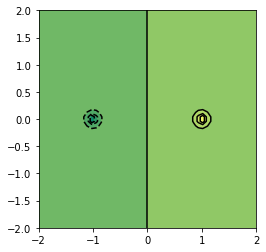

In [42]:
aV = 2

xV = np.linspace(-aV, aV)
yV = np.linspace(-aV, aV)

XV, YV = np.meshgrid(xV, yV)

V1 = V(XV, YV, q, 1, 0)
V2 = V(XV, YV, -q, -1, 0)

Vt = V1 + V2

plt.contourf(XV, YV, Vt, cmap = 'summer')
plt.contour(XV, YV, Vt, colors = 'k')
plt.axis('scaled')
plt.show()